### random forest

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


data = "../data/heart.csv"

df = pd.read_csv(data, index_col=0)
df.head()



,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [44]:
# Eda

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 35.5+ KB


In [45]:
df.isna()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False
302,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [46]:
df.isna()["Ca"]

1      False
2      False
3      False
4      False
5      False
       ...  
299    False
300    False
301    False
302    False
303     True
Name: Ca, Length: 303, dtype: bool

In [47]:
df[df.isna()["Ca"]] # mask av isna ["Ca"] tar ut värderna som har missing values 

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
167,52,1,nonanginal,138,223,0,0,169,0,0.0,1,NaN,normal,No
193,43,1,asymptomatic,132,247,1,2,143,1,0.1,2,NaN,reversable,Yes
288,58,1,nontypical,125,220,0,0,144,0,0.4,2,NaN,reversable,No
303,38,1,nonanginal,138,175,0,0,173,0,0.0,1,NaN,normal,No


In [48]:
df["Ca"].value_counts()

Ca
0.0    176
1.0     65
2.0     38
3.0     20
Name: count, dtype: int64

In [49]:
df[df.isna()["Thal"]] # Hitta NaN i ["Thal"]

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
88,53,0,nonanginal,128,216,0,2,115,0,0.0,1,0.0,NaN,No
267,52,1,asymptomatic,128,204,1,0,156,1,1.0,2,0.0,NaN,Yes


In [50]:
df = df.dropna() # droppar nullvärden

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 1 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        297 non-null    int64  
 1   Sex        297 non-null    int64  
 2   ChestPain  297 non-null    object 
 3   RestBP     297 non-null    int64  
 4   Chol       297 non-null    int64  
 5   Fbs        297 non-null    int64  
 6   RestECG    297 non-null    int64  
 7   MaxHR      297 non-null    int64  
 8   ExAng      297 non-null    int64  
 9   Oldpeak    297 non-null    float64
 10  Slope      297 non-null    int64  
 11  Ca         297 non-null    float64
 12  Thal       297 non-null    object 
 13  AHD        297 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 34.8+ KB


<Axes: xlabel='AHD', ylabel='count'>

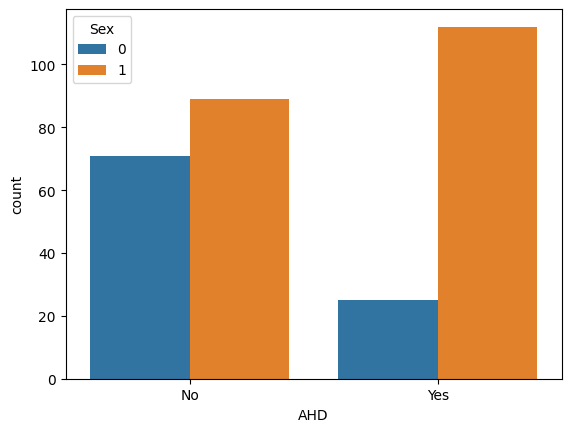

In [52]:
sns.countplot(data=df, x = "AHD", hue="Sex")

<Axes: xlabel='Age', ylabel='Count'>

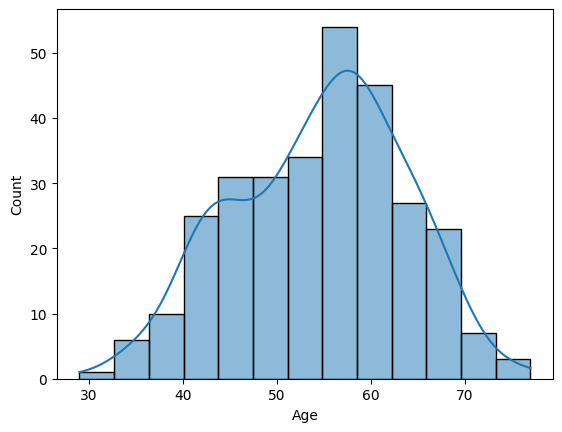

In [53]:
sns.histplot(data=df, x="Age", kde=True)

<Axes: xlabel='Chol', ylabel='Count'>

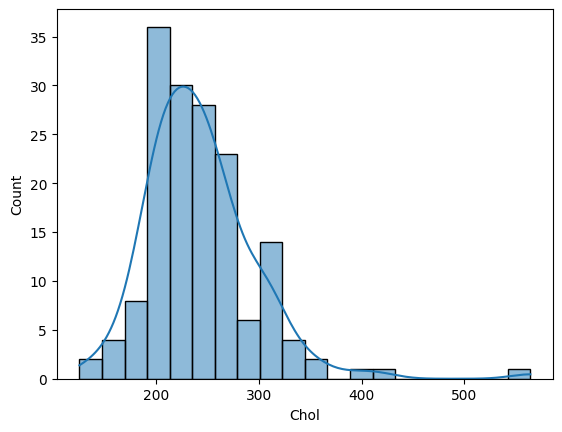

In [54]:
sns.histplot(data=df.query("AHD == 'No'"), x="Chol", kde=True)

In [55]:
df["ChestPain"].value_counts()

ChestPain
asymptomatic    142
nonanginal       83
nontypical       49
typical          23
Name: count, dtype: int64

<Axes: xlabel='ChestPain'>

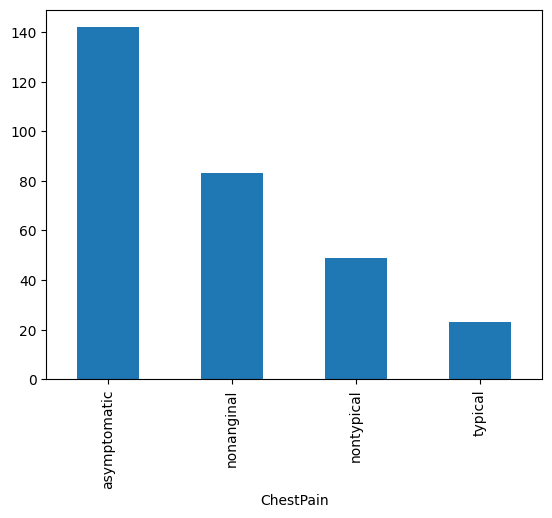

In [56]:
df["ChestPain"].value_counts().plot(kind="bar")

### Dummies

In [57]:
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,asymptomatic,140,241,0,0,123,1,0.2,2,0.0,reversable,Yes
299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes


pd.get_dummies(df): Detta omvandlar kategoriska variabler i df till dummy-variabler (även kända som indikatorvariabler). För varje unik kategori i varje kategorisk kolumn i df skapas en ny kolumn, som får namnet på den ursprungliga kolumnen följt av värdet på kategorin. Varje rad i dessa nya kolumner kommer att ha värdet 1 om radens ursprungliga värde matchade kolumnens kategori och 0 annars.

drop_first=True: Detta argument instruerar pd.get_dummies() att undvika den första dummy-variabeln för varje original kategorisk variabel. Varför kan detta vara användbart?

För att undvika fällan med perfekt multikollinearitet (dummy variable trap): När alla dummy-variabler inkluderas, kommer de att vara perfekt korrelerade (summan av alla dummy-variabler för en given observation kommer alltid att vara 1). Detta kan leda till problem i vissa statistiska modeller, särskilt i linjär regression, där oberoende mellan förklarande variabler är en viktig antagande.

Dimensionalitetsreduktion: Det minskar antalet variabler som introduceras i modellen, vilket kan vara särskilt användbart i situationer med ett stort antal kategorier.

In [58]:
df_dummies = pd.get_dummies(df, drop_first=True)

In [59]:
df_dummies

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable,AHD_Yes
1,63,1,145,233,1,2,150,0,2.3,3,0.0,False,False,True,False,False,False
2,67,1,160,286,0,2,108,1,1.5,2,3.0,False,False,False,True,False,True
3,67,1,120,229,0,2,129,1,2.6,2,2.0,False,False,False,False,True,True
4,37,1,130,250,0,0,187,0,3.5,3,0.0,True,False,False,True,False,False
5,41,0,130,204,0,2,172,0,1.4,1,0.0,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,0,123,1,0.2,2,0.0,False,False,False,False,True,True
299,45,1,110,264,0,0,132,0,1.2,2,0.0,False,False,True,False,True,True
300,68,1,144,193,1,0,141,0,3.4,2,2.0,False,False,False,False,True,True
301,57,1,130,131,0,0,115,1,1.2,2,1.0,False,False,False,False,True,True


In [60]:
# Train|test split
from sklearn.model_selection import train_test_split

X, y = df_dummies.drop("AHD_Yes", axis=1), df_dummies["AHD_Yes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [61]:
## Random forest
# Behöver inte skala datasetet i random forest

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred

array([False,  True, False,  True, False, False,  True,  True,  True,
       False, False, False, False,  True,  True, False, False, False,
        True, False,  True,  True,  True, False,  True, False,  True,
        True, False, False, False, False,  True, False, False, False,
        True, False,  True,  True, False,  True,  True,  True, False,
        True,  True,  True, False, False, False,  True, False, False,
        True, False, False, False,  True,  True, False, False,  True,
       False, False, False,  True, False,  True,  True,  True,  True,
        True, False,  True, False, False, False, False, False, False,
        True,  True,  True,  True, False, False,  True, False,  True,
        True,  True, False, False, False,  True, False, False, False])

              precision    recall  f1-score   support

       False       0.81      0.83      0.82        53
        True       0.80      0.78      0.79        46

    accuracy                           0.81        99
   macro avg       0.81      0.81      0.81        99
weighted avg       0.81      0.81      0.81        99



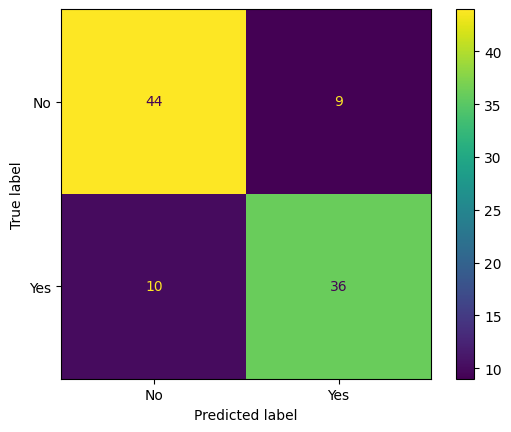

In [62]:
# Evaluation

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

def evaluate_classification (y_test, y_pred, labels= ["No", "Yes"]):
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=labels).plot()

evaluate_classification(y_test, y_pred)

In [63]:
model.feature_importances_ # detta visar hur viktiga varje feature är för random forest modellen.

array([0.0931407 , 0.03372479, 0.07013429, 0.0792663 , 0.00730311,
       0.02068672, 0.1240207 , 0.04023465, 0.10045081, 0.02231842,
       0.17844666, 0.04327672, 0.00937807, 0.01567818, 0.09106361,
       0.07087628])

In [64]:
model.feature_importances_.sum()

1.0

<Axes: xlabel='Importance', ylabel='Feature'>

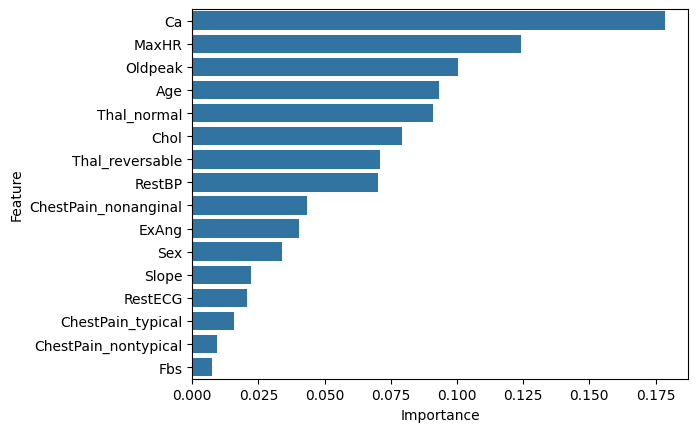

In [67]:
feature_importance = pd.DataFrame([X.columns, model.feature_importances_]).T # Transporerar. rader blir kolumner och tvärt om
feature_importance.columns = ["Feature", "Importance"]
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)
sns.barplot(data= feature_importance, x= "Importance", y="Feature")